## Data Cleanning

In [1]:
import pandas as pd
import numpy as np
import time
import scipy.stats as stats
from datetime import datetime
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
nasdaq = pd.read_csv('nasdaq100_data.csv', parse_dates=[0], index_col=[0,1])
nasdaq = nasdaq.unstack()
nasdaq = nasdaq.xs(key='Adj Close', axis=1, level=1)
nasdaq.tail()

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TTD,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,131.299820,85.250000,338.450012,161.535767,237.013687,188.160004,92.992256,203.669998,96.534142,64.519997,...,44.880001,159.378784,174.763275,289.690002,36.890579,9.17,164.639999,68.689735,65.889999,108.779999
2022-12-27,129.477585,83.489998,335.089996,159.918823,237.102219,186.289993,93.575340,204.589996,94.667404,63.270000,...,43.820000,158.797043,174.713516,287.320007,36.584988,9.23,163.399994,69.309517,65.459999,107.570000
2022-12-28,125.504539,82.489998,328.329987,158.025833,233.974045,181.899994,92.671555,201.580002,93.565239,62.570000,...,43.320000,156.285828,173.389938,285.760010,35.887859,8.87,162.990005,68.810287,65.360001,107.860001
2022-12-29,129.059372,85.230003,337.579987,161.673813,236.698898,188.119995,93.303230,212.139999,96.454704,64.820000,...,45.340000,159.999313,177.201462,289.079987,35.782814,9.43,167.789993,69.297813,68.000000,111.870003
2022-12-30,129.378006,85.500000,336.529999,161.723099,234.967590,186.869995,92.273109,210.899994,96.693016,64.769997,...,44.830002,160.193222,175.569366,288.779999,35.677761,9.48,167.330002,68.361755,67.739998,111.900002


In [3]:
sp = pd.read_csv('sp500_data.csv', parse_dates=[0], index_col=[0,1])
sp = sp.unstack()
sp = sp.xs(key='Adj Close', axis=1, level=1)
sp

,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,1.321077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,1.328609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,1.342167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,1.349698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,1.367774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,115.073792,55.871159,106.058311,156.766922,261.928558,93.052528,338.450012,237.013687,28.082800,70.472534,...,240.837219,560.591492,80.324600,68.689743,108.675713,127.117897,248.220001,125.965240,46.701611,144.788239
2022-12-27,115.150421,56.627228,106.440666,156.661209,261.160736,94.321167,335.089996,237.102219,28.219885,70.953812,...,241.024475,560.819702,83.916924,69.309517,109.656204,128.104065,251.000000,126.551857,47.077534,144.331329
2022-12-28,113.301804,55.743507,105.715179,155.930695,259.005005,92.069092,328.329987,233.974045,27.730295,70.197517,...,238.225769,552.615662,79.697693,68.810280,107.893311,127.522232,246.839996,125.269241,46.238930,142.871124


In [4]:
df = pd.concat([nasdaq,sp],axis=1)

In [5]:
df.shape

(13369, 604)

In [6]:
df.columns.unique()

Index(['AAPL', 'ABNB', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT',
       'AMD',
       ...
       'WMB', 'WTW', 'GWW', 'WYNN', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=520)

In [7]:
df = pd.DataFrame(df.to_dict())
df.shape

(13369, 520)

## Download Data

In [8]:
def calculate_daily_returns(ticker, start_date, end_date):
    # Download historical data
    data = yf.download(ticker, start=start_date, end=end_date)

    # daily returns
    daily_returns = data['Adj Close'].ffill().pct_change()

    return daily_returns

In [9]:
# S&P 500
sp500_returns = calculate_daily_returns("^GSPC", "2000-01-01", "2022-12-30")

# NASDAQ 100
nasdaq100_returns = calculate_daily_returns("^NDX", "2000-01-01", "2022-12-30")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
# Get Risk free rate
irx = yf.download("^IRX", start="2000-01-01",end="2022-12-30")

[*********************100%%**********************]  1 of 1 completed


In [11]:
# reset index
df = df.reset_index()
df['index'] = pd.to_datetime(df['index'])
df.index = df['index']

In [12]:
# combine the data with T-bill return
df = df.merge(irx['Close'], left_index=True, right_index=True, how='inner')
df['Tbill yield filled'] = df['Close'].fillna(method='ffill')
df['dow'] = df.index.dayofweek
df['lagdow'] = df['dow'].shift()
df['numdays'] = 1
df.loc[df['dow'] > (df['lagdow']+1), 'numdays'] = df['dow'] - df['lagdow']
df.loc[df['dow'] < df['lagdow'], 'numdays'] = 3 + df['dow'] + (4 - df['lagdow'])
df.loc['2001-09-17','numdays'] = 7
df['Tbill ret'] = df['Tbill yield filled'].shift() * df['numdays'] / 365 / 100

In [13]:
df.drop(['index', 'Close', 'Tbill yield filled', 'dow', 'lagdow', 'numdays'], axis=1, inplace=True)
df.shape

(5779, 521)

In [14]:
# compute yearly return for sp500
Yearly_Profit_sp500 = {
    'Year':[],
    'Profit':[]
}
for year in range(2000,2023):
    start,end = str(year)+'-01-01', str(year+1)+'-01-01'
    temp_df = sp500_returns.loc[start:end]
    Yearly_Profit_sp500['Year'].append(datetime.strptime(str(year), "%Y").year)
    Yearly_Profit_sp500['Profit'].append((1+temp_df).cumprod()[-1]-1)
Yearly_Profit_sp500 = pd.DataFrame(Yearly_Profit_sp500)
Yearly_Profit_sp500

,Year,Profit
0,2000,-0.092728
1,2001,-0.130427
2,2002,-0.233660
3,2003,0.263804
4,2004,0.089935
5,2005,0.030010
6,2006,0.136194
7,2007,0.035296
8,2008,-0.384858
9,2009,0.234542


In [15]:
# compute yearly return for NASDAQ 100
Yearly_Profit_nasdaq100 = {
    'Year':[],
    'Profit':[]
}
for year in range(2000,2023):
    start,end = str(year)+'-01-01', str(year+1)+'-01-01'
    temp_df = nasdaq100_returns.loc[start:end]
    Yearly_Profit_nasdaq100['Year'].append(datetime.strptime(str(year), "%Y").year)
    Yearly_Profit_nasdaq100['Profit'].append((1+temp_df).cumprod()[-1]-1)
Yearly_Profit_nasdaq100 = pd.DataFrame(Yearly_Profit_nasdaq100)
Yearly_Profit_nasdaq100

,Year,Profit
0,2000,-0.382227
1,2001,-0.326536
2,2002,-0.375816
3,2003,0.491228
4,2004,0.104365
5,2005,0.014854
6,2006,0.067895
7,2007,0.186709
8,2008,-0.418853
9,2009,0.535353


## Strategy

In [16]:
def candidate_base(df,year,size):
    start,end = str(year-1)+'-12-01', str(year+1)+'-01-01'
    temp = df.loc[start:end]
    temp = temp.dropna(axis='columns', how='any')
    volatility = pd.DataFrame(temp.std().sort_values(ascending=False),columns=['Volatility'])
    top = volatility.iloc[:size]
    temp_filter = temp[temp.columns[temp.columns.isin(list(top.index)+['Tbill ret'])]]
    return top.index,temp_filter

In [17]:
def calculate_macd(df, ticker, short_window=12, long_window=26, signal_window=9):
    EMA_short = df[ticker].ewm(span=short_window, adjust=False).mean()
    EMA_long = df[ticker].ewm(span=long_window, adjust=False).mean()
    df[ticker+'_MACD'] = EMA_short - EMA_long
    df[ticker+'_Signal_line'] = df[ticker+'_MACD'].ewm(span=signal_window, adjust=False).mean()
    return df

In [18]:
def generate_macd_signals(df,ticker,size):
    df[ticker+'_Hold'] = 0
    df[ticker+'_Hold'][1:] = np.where(df[ticker+'_MACD'][1:] > df[ticker+'_Signal_line'][1:], 1/size, 0)
    df[ticker+'_Hold'] = df[ticker+'_Hold'].shift()
    return df

## Strategy 1 MACD

In [19]:
Yearly_Profit = {
    'Year':[],
    'Profit':[]
}

In [20]:
profit = 1
daily_pnl = pd.DataFrame()
temp_df =df.loc['2000-01-04':'2022-12-30']
temp_df =df.iloc[:, 0:520]
for year in range(2000,2023):
    temp_df = df[df.index.year==year]
    temp_df = temp_df.dropna(axis='columns', how='any')
    candidates=temp_df.columns
    size=len(candidates)
    for ticker in candidates:
        temp_df = calculate_macd(temp_df, ticker, short_window=12, long_window=26, signal_window=9)
        temp_df[ticker+'_Change'] = temp_df[ticker].pct_change()

    start,end = str(year)+'-01-01', str(year+1)+'-01-01'
    temp_df = temp_df.loc[start:end]

    for ticker in candidates:
        temp_df = generate_macd_signals(temp_df,ticker,size)

    temp_df['Cash'] = 1-temp_df[[ticker+'_Hold' for ticker in candidates]].sum(axis=1)
    columns_to_sum = [temp_df[ticker+'_Hold'] * temp_df[ticker+'_Change'] for ticker in candidates]
    temp_df['PnL'] = pd.concat(columns_to_sum, axis=1).sum(axis=1)
    daily_pnl = pd.concat([daily_pnl,temp_df['PnL']])
    Yearly_Profit['Year'].append(year)
    Yearly_Profit['Profit'].append((1+temp_df['PnL']).cumprod()[-1]-1)
    profit *= (1+temp_df['PnL']).cumprod()[-1]
    print(year,profit)

2000 1.1265511137416027
2001 1.200164802193159
2002 1.031348370724165
2003 1.1268100878322436
2004 1.1456875034117218
2005 1.167965520353644
2006 1.1603201974196435
2007 1.1142434556745107
2008 0.8912409006717155
2009 1.0566642804494857
2010 1.1251186821040666
2011 1.1246956703021243
2012 1.1573915905842376
2013 1.3685619852369315
2014 1.5516116686957477
2015 1.6227809287430481
2016 1.701402830693763
2017 1.8115598373738457
2018 1.6715950545265794
2019 1.871728528912727
2020 2.255513496890213
2021 2.6291598261392624
2022 2.3979616727411557


In [21]:
Yearly_Profit = pd.DataFrame(Yearly_Profit)
Yearly_Profit

,Year,Profit
0,2000,0.126551
1,2001,0.065344
2,2002,-0.140661
3,2003,0.092560
4,2004,0.016753
5,2005,0.019445
6,2006,-0.006546
7,2007,-0.039710
8,2008,-0.200138
9,2009,0.185610


## Strategy 2 MACD w Volatility size=25

In [22]:
Yearly_Profit2 = {
    'Year':[],
    'Profit':[]
}

In [23]:
# caluclate the daily strategy return with volatility
size=25
profit = 1
daily_pnl_v = pd.DataFrame()
df=df.loc['2000-01-04':'2022-12-30']
for year in range(2000,2023):
    candidates,temp_df =  candidate_base(df,year,size)
    for ticker in candidates:
        temp_df = calculate_macd(temp_df, ticker, short_window=12, long_window=26, signal_window=9)
        temp_df[ticker+'_Change'] = temp_df[ticker].pct_change()
    start,end = str(year)+'-01-01', str(year+1)+'-01-01'
    temp_df = temp_df.loc[start:end]

    for ticker in candidates:
        temp_df = generate_macd_signals(temp_df,ticker,size)

    temp_df['Cash'] = 1-temp_df[[ticker+'_Hold' for ticker in candidates]].sum(axis=1)
    columns_to_sum = [temp_df[ticker+'_Hold'] * temp_df[ticker+'_Change'] for ticker in candidates]
    temp_df['PnL'] = pd.concat(columns_to_sum, axis=1).sum(axis=1)
    daily_pnl_v = pd.concat([daily_pnl_v,temp_df['PnL']])
    Yearly_Profit2['Year'].append(year)
    Yearly_Profit2['Profit'].append((1+temp_df['PnL']).cumprod()[-1]-1)
    profit *= (1+temp_df['PnL']).cumprod()[-1]

In [24]:
Yearly_Profit2 = pd.DataFrame(Yearly_Profit2)

In [25]:
Yearly_Profit2

,Year,Profit
0,2000,0.049367
1,2001,0.308652
2,2002,-0.224775
3,2003,0.248964
4,2004,0.218315
5,2005,0.103747
6,2006,0.130763
7,2007,0.115911
8,2008,-0.396978
9,2009,0.418641


## Strategy 3 MACD w Volatility size=50

In [ ]:
Yearly_Profit3 = {
    'Year':[],
    'Profit':[]
}

In [ ]:
# caluclate the daily strategy return with volatility
size=50
profit = 1
daily_pnl_v_50 = pd.DataFrame()
df=df.loc['2000-01-04':'2022-12-30']
for year in range(2000,2023):
    candidates,temp_df =  candidate_base(df,year,size)
    for ticker in candidates:
        temp_df = calculate_macd(temp_df, ticker, short_window=12, long_window=26, signal_window=9)
        temp_df[ticker+'_Change'] = temp_df[ticker].pct_change()
    start,end = str(year)+'-01-01', str(year+1)+'-01-01'
    temp_df = temp_df.loc[start:end]

    for ticker in candidates:
        temp_df = generate_macd_signals(temp_df,ticker,size)

    temp_df['Cash'] = 1-temp_df[[ticker+'_Hold' for ticker in candidates]].sum(axis=1)
    columns_to_sum = [temp_df[ticker+'_Hold'] * temp_df[ticker+'_Change'] for ticker in candidates]
    temp_df['PnL'] = pd.concat(columns_to_sum, axis=1).sum(axis=1)
    daily_pnl_v_50 = pd.concat([daily_pnl_v_50,temp_df['PnL']])
    Yearly_Profit3['Year'].append(year)
    Yearly_Profit3['Profit'].append((1+temp_df['PnL']).cumprod()[-1]-1)
    profit *= (1+temp_df['PnL']).cumprod()[-1]

In [ ]:
Yearly_Profit3 = pd.DataFrame(Yearly_Profit3)
Yearly_Profit3

,Year,Profit
0,2000,0.165816
1,2001,0.206469
2,2002,-0.211067
3,2003,0.273210
4,2004,0.207174
5,2005,0.106994
6,2006,0.106760
7,2007,0.067862
8,2008,-0.316227
9,2009,0.401558


## Strategy 4 MACD w Volatility size=100

In [ ]:
Yearly_Profit4 = {
    'Year':[],
    'Profit':[]
}

In [ ]:
# caluclate the daily strategy return with volatility
size=100
profit = 1
daily_pnl_v_100 = pd.DataFrame()
df=df.loc['2000-01-04':'2022-12-30']
for year in range(2000,2023):
    candidates,temp_df =  candidate_base(df,year,size)
    for ticker in candidates:
        temp_df = calculate_macd(temp_df, ticker, short_window=12, long_window=26, signal_window=9)
        temp_df[ticker+'_Change'] = temp_df[ticker].pct_change()
    start,end = str(year)+'-01-01', str(year+1)+'-01-01'
    temp_df = temp_df.loc[start:end]

    for ticker in candidates:
        temp_df = generate_macd_signals(temp_df,ticker,size)

    temp_df['Cash'] = 1-temp_df[[ticker+'_Hold' for ticker in candidates]].sum(axis=1)
    columns_to_sum = [temp_df[ticker+'_Hold'] * temp_df[ticker+'_Change'] for ticker in candidates]
    temp_df['PnL'] = pd.concat(columns_to_sum, axis=1).sum(axis=1)
    daily_pnl_v_100 = pd.concat([daily_pnl_v_100,temp_df['PnL']])
    Yearly_Profit4['Year'].append(year)
    Yearly_Profit4['Profit'].append((1+temp_df['PnL']).cumprod()[-1]-1)
    profit *= (1+temp_df['PnL']).cumprod()[-1]

In [ ]:
Yearly_Profit4 = pd.DataFrame(Yearly_Profit4)
Yearly_Profit4

,Year,Profit
0,2000,0.132774
1,2001,0.141087
2,2002,-0.159367
3,2003,0.245558
4,2004,0.160249
5,2005,0.112623
6,2006,0.084089
7,2007,0.037008
8,2008,-0.272363
9,2009,0.363654


In [ ]:
df['daily_pnl']=daily_pnl
df['daily_pnl_v']=daily_pnl_v
df['sp500_returns']=sp500_returns
df['nasdaq100_returns']=nasdaq100_returns

In [ ]:
df['daily_pnl_v_50']=daily_pnl_v_50
df['daily_pnl_v_100']=daily_pnl_v_100

## Graph

1. Cumulative Excess Returns for MACD Strategy

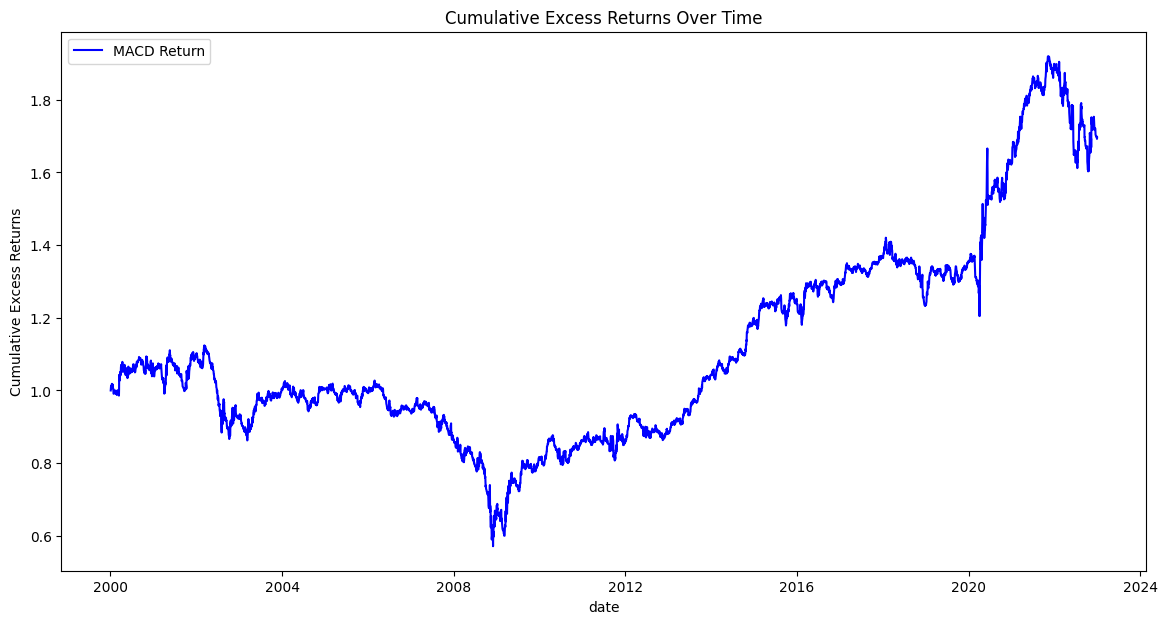

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df.index,(1+df['daily_pnl']-df['Tbill ret']).cumprod(), label='MACD Return',color='blue')
plt.title('Cumulative Excess Returns Over Time')
plt.xlabel('date')
plt.ylabel('Cumulative Excess Returns')
plt.legend()
plt.show()

2. Cumulative Excess Returns for Sp500 and NASDAQ100

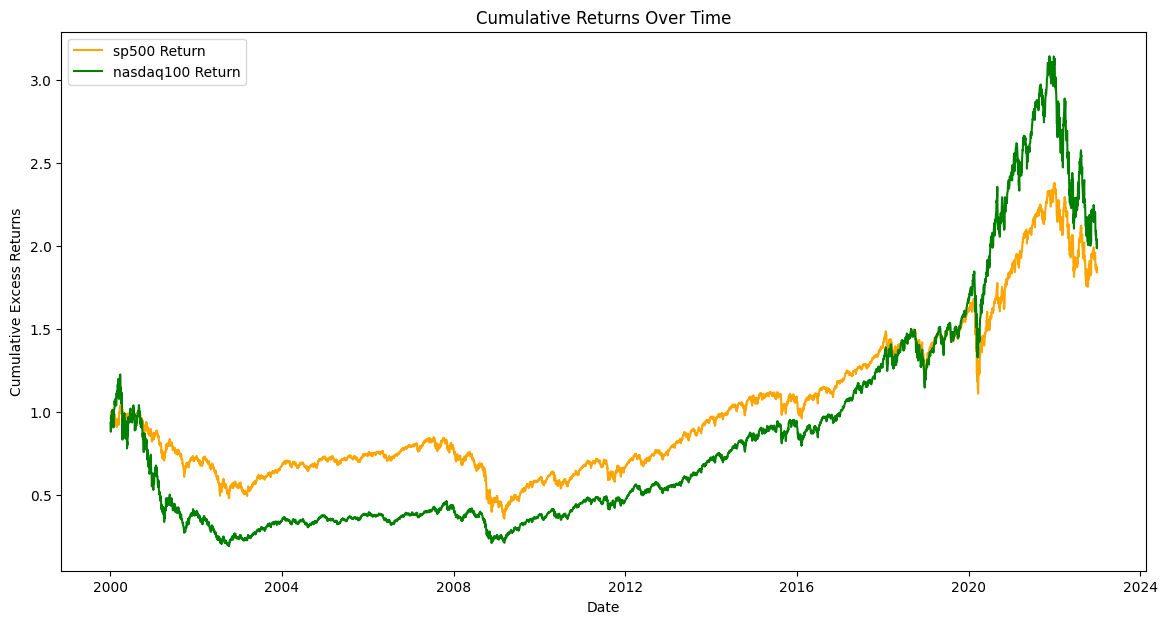

In [ ]:
# Calculate cumulative returns for the sp500
cumulative_sp500_returns = (1 + df['sp500_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for
cumulative_nasdaq100_returns=(1 + df['nasdaq100_returns']-df['Tbill ret']).cumprod()
# Plotting all the strategies on the same graph
plt.figure(figsize=(14, 7))
plt.plot(df.index, cumulative_sp500_returns,label='sp500 Return',color='orange')
plt.plot(df.index, cumulative_nasdaq100_returns,label='nasdaq100 Return',color='green')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Returns')
plt.legend()
plt.show()

3. Culmulative Excess Returns for Sp500, NASDAQ100, and MACD

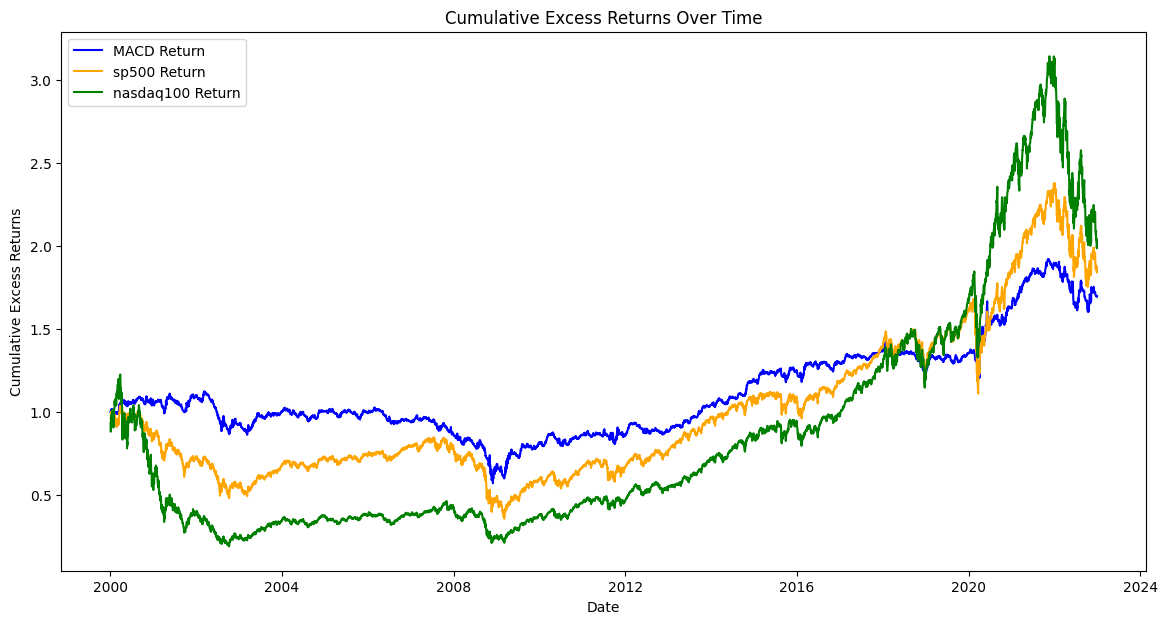

In [ ]:
# Calculate cumulative returns for the sp500
cumulative_sp500_returns = (1 + df['sp500_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for
cumulative_nasdaq100_returns=(1 + df['nasdaq100_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the strategy
cumulative_MACD_returns = (1 + df['daily_pnl']-df['Tbill ret']).cumprod()

# Plotting all the strategies on the same graph
plt.figure(figsize=(14, 7))
plt.plot(df.index,cumulative_MACD_returns, label='MACD Return',color='blue')
plt.plot(df.index, cumulative_sp500_returns,label='sp500 Return',color='orange')
plt.plot(df.index, cumulative_nasdaq100_returns,label='nasdaq100 Return',color='green')
plt.title('Cumulative Excess Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Returns')
plt.legend()
plt.show()

4. Culmulative Excess Returns for Sp500, NASDAQ100, MACD and MACD with Volatility(size=25)




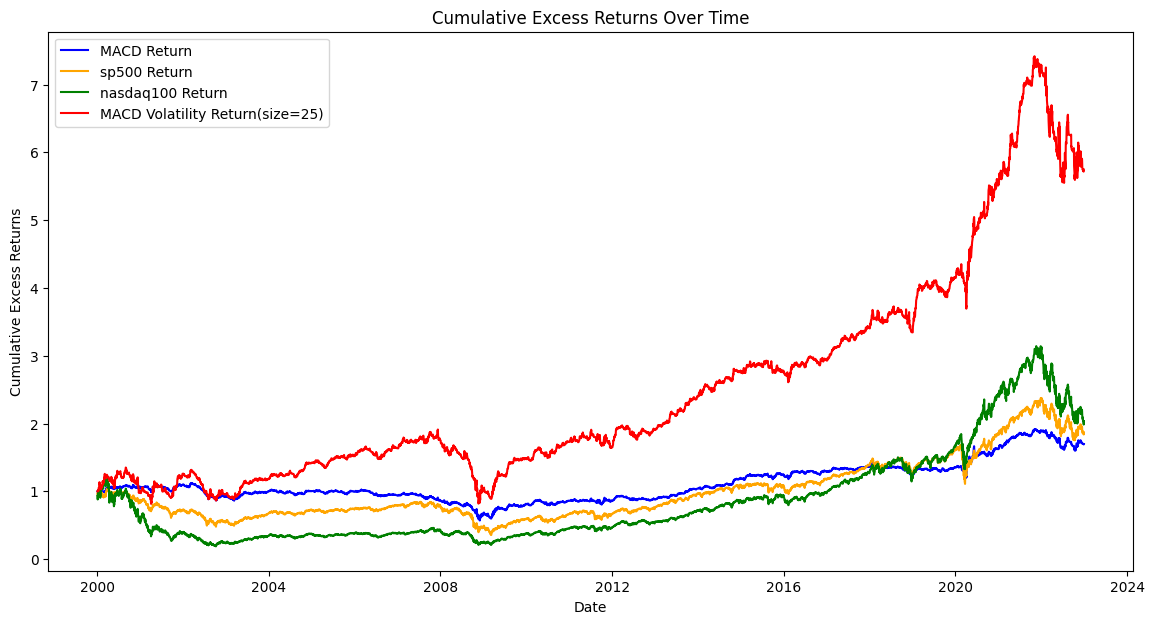

In [ ]:
# Calculate cumulative returns for the MACD_Volatility
cumulative_MACD_v_returns = (1 + df['daily_pnl_v']-df['Tbill ret'] ).cumprod()

# Calculate cumulative returns for the sp500
cumulative_sp500_returns = (1 + df['sp500_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the nasdaq100
cumulative_nasdaq100_returns=(1 + df['nasdaq100_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the MACD
cumulative_MACD_returns = (1 + df['daily_pnl']-df['Tbill ret'] ).cumprod()

# Plotting all the on the same graph
plt.figure(figsize=(14, 7))
plt.plot(df.index,cumulative_MACD_returns, label='MACD Return',color='blue')
plt.plot(df.index, cumulative_sp500_returns,label='sp500 Return',color='orange')
plt.plot(df.index, cumulative_nasdaq100_returns,label='nasdaq100 Return',color='green')
plt.plot(df.index,cumulative_MACD_v_returns, label='MACD Volatility Return(size=25)',color='red')
plt.title('Cumulative Excess Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Returns')
plt.legend()
plt.show()

5. Culmulative Excess Returns for Sp500, NASDAQ100, MACD,MACD with Volatility(size=25), and MACD with Volatility(size=50)


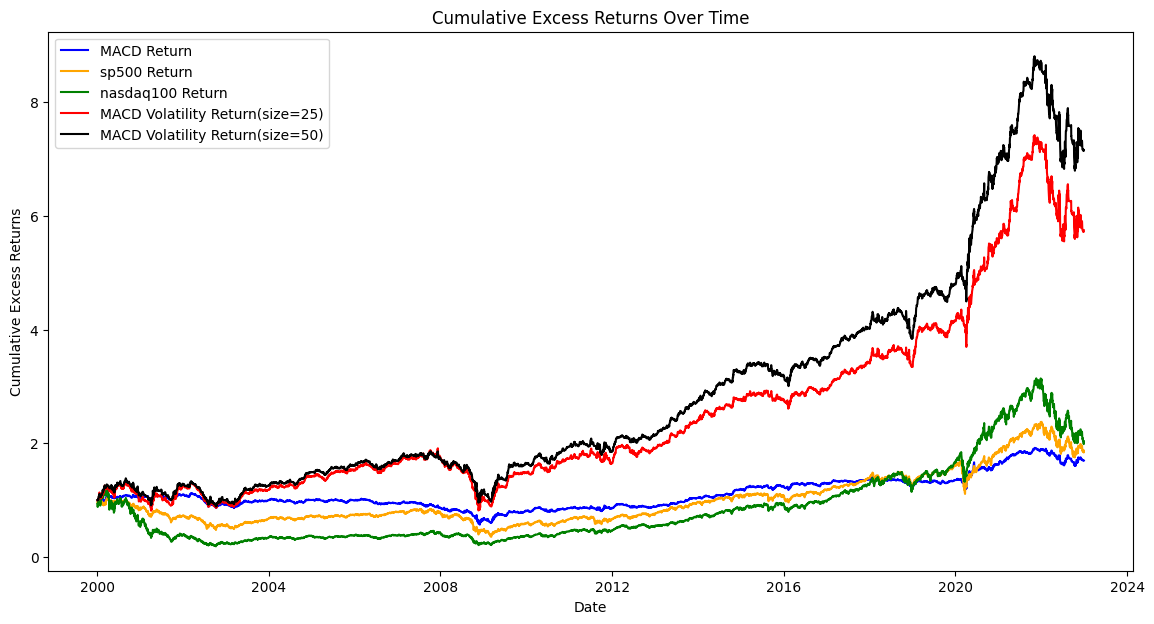

In [ ]:
# Calculate cumulative returns for the MACD_Volatility
cumulative_MACD_v_returns = (1 + df['daily_pnl_v']-df['Tbill ret'] ).cumprod()

# Calculate cumulative returns for the sp500
cumulative_sp500_returns = (1 + df['sp500_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the nasdaq100
cumulative_nasdaq100_returns=(1 + df['nasdaq100_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the MACD
cumulative_MACD_returns = (1 + df['daily_pnl']-df['Tbill ret'] ).cumprod()
# Calculate cumulative returns for the MACD_Volatility_50
cumulative_MACD_v_50_returns=(1+df['daily_pnl_v_50']-df['Tbill ret']).cumprod()
# Plotting all the on the same graph
plt.figure(figsize=(14, 7))
plt.plot(df.index,cumulative_MACD_returns, label='MACD Return',color='blue')
plt.plot(df.index, cumulative_sp500_returns,label='sp500 Return',color='orange')
plt.plot(df.index, cumulative_nasdaq100_returns,label='nasdaq100 Return',color='green')
plt.plot(df.index,cumulative_MACD_v_returns, label='MACD Volatility Return(size=25)',color='red')
plt.plot(df.index, cumulative_MACD_v_50_returns,label='MACD Volatility Return(size=50)',color='black')
plt.title('Cumulative Excess Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Returns')
plt.legend()
plt.show()

6. Culmulative Excess Returns for Sp500, NASDAQ100, MACD,MACD with Volatility(size=25), MACD with Volatility(size=50), and MACD with Volatility(size=100)

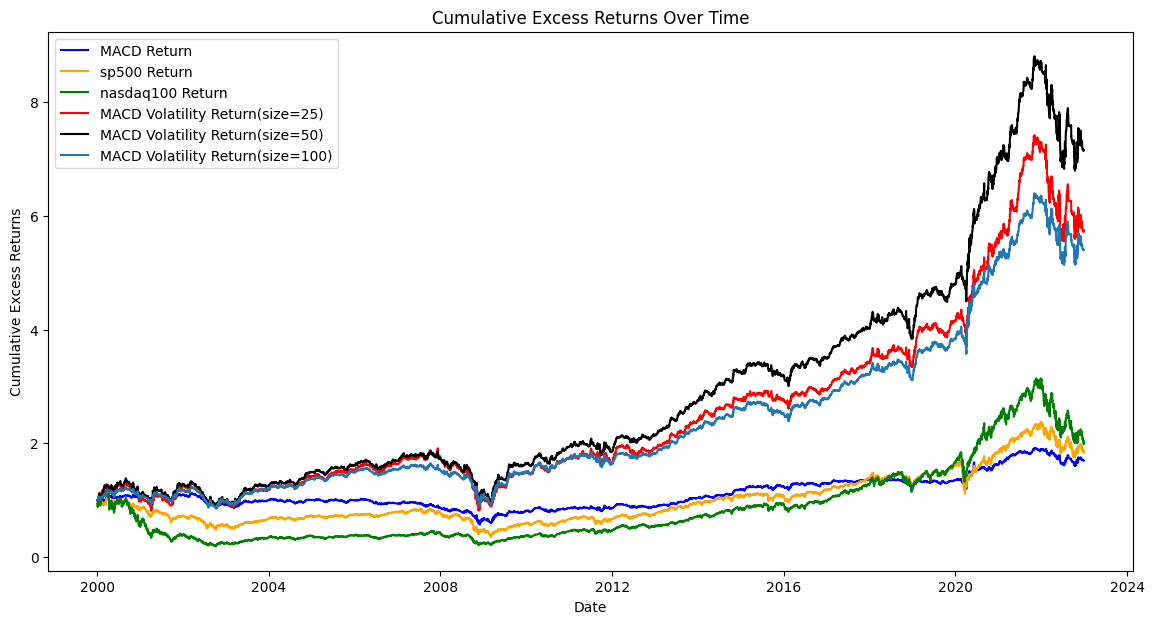

In [ ]:
# Calculate cumulative returns for the MACD_Volatility
cumulative_MACD_v_returns = (1 + df['daily_pnl_v']-df['Tbill ret'] ).cumprod()

# Calculate cumulative returns for the sp500
cumulative_sp500_returns = (1 + df['sp500_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the nasdaq100
cumulative_nasdaq100_returns=(1 + df['nasdaq100_returns']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the MACD
cumulative_MACD_returns = (1 + df['daily_pnl']-df['Tbill ret'] ).cumprod()
# Calculate cumulative returns for the MACD_Volatility_50
cumulative_MACD_v_50_returns=(1+df['daily_pnl_v_50']-df['Tbill ret']).cumprod()

# Calculate cumulative returns for the MACD_Volatility_100
cumulative_MACD_v_100_returns=(1+df['daily_pnl_v_100']-df['Tbill ret']).cumprod()

# Plotting all the on the same graph
plt.figure(figsize=(14, 7))
plt.plot(df.index,cumulative_MACD_returns, label='MACD Return',color='blue')
plt.plot(df.index, cumulative_sp500_returns,label='sp500 Return',color='orange')
plt.plot(df.index, cumulative_nasdaq100_returns,label='nasdaq100 Return',color='green')
plt.plot(df.index,cumulative_MACD_v_returns, label='MACD Volatility Return(size=25)',color='red')
plt.plot(df.index, cumulative_MACD_v_50_returns,label='MACD Volatility Return(size=50)',color='black')
plt.plot(df.index, cumulative_MACD_v_100_returns,label='MACD Volatility Return(size=100)')
plt.title('Cumulative Excess Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Returns')
plt.legend()
plt.show()

Thus, 50 is a better size for the strategy

In [89]:
import matplotlib.pyplot as plt
import numpy as np

## Calculate Statistics

In [ ]:
def calculate_statistics(rt,rf):
  mean=(rt-rf).mean()
  std=(rt-rf).std()
  sharpe_ratio=mean/std* np.sqrt(252)
  t_stat, p_value = stats.ttest_1samp(np.array(rt-rf), 0)
  result_df = pd.DataFrame({
  'value': [mean, std, sharpe_ratio, round(t_stat,2)]}, index=['Mean', 'Standard Deviation', 'Sharpe Ratio','T Statistic'])
  return result_df

In [ ]:
df_Sp500= calculate_statistics(df['sp500_returns'],df['Tbill ret'])
df_Sp500.rename(columns={'value': 'Sp500'}, inplace=True)
df_Sp500

,Sp500
Mean,0.000187
Standard Deviation,0.012517
Sharpe Ratio,0.237097
T Statistic,1.140000


In [ ]:
df_nasdaq100=calculate_statistics(df['nasdaq100_returns'],df['Tbill ret'])
df_nasdaq100.rename(columns={'value': 'Nasdaq100'}, inplace=True)
df_nasdaq100

,Nasdaq100
Mean,0.000280
Standard Deviation,0.017747
Sharpe Ratio,0.250643
T Statistic,1.200000


In [ ]:
df_strategy=calculate_statistics(df['daily_pnl'],df['Tbill ret'])
df_strategy.rename(columns={'value': 'MACD'}, inplace=True)
df_strategy

,MACD
Mean,0.000116
Standard Deviation,0.007020
Sharpe Ratio,0.262426
T Statistic,1.260000


In [ ]:
df_strategy1=calculate_statistics(df['daily_pnl_v'],df['Tbill ret'])
df_strategy1.rename(columns={'value': 'MACD Volatility(25)'}, inplace=True)
df_strategy1

,MACD Volatility(25)
Mean,0.000355
Standard Deviation,0.010218
Sharpe Ratio,0.551415
T Statistic,2.640000


In [ ]:
df_strategy2=calculate_statistics(df['daily_pnl_v_50'],df['Tbill ret'])
df_strategy2.rename(columns={'value': 'MACD Volatility(50)'}, inplace=True)
df_strategy2

,MACD Volatility(50)
Mean,0.000384
Standard Deviation,0.009347
Sharpe Ratio,0.652725
T Statistic,3.130000


In [ ]:
df_strategy3=calculate_statistics(df['daily_pnl_v_100'],df['Tbill ret'])
df_strategy3.rename(columns={'value': 'MACD Volatility(100)'}, inplace=True)
df_strategy3

,MACD Volatility(100)
Mean,0.000328
Standard Deviation,0.008492
Sharpe Ratio,0.613102
T Statistic,2.940000


In [ ]:
# Concatenate df with all the excess returns
concatenated_df = pd.concat([df_Sp500, df_nasdaq100,df_strategy,df_strategy1,df_strategy2,df_strategy3], axis=1)
concatenated_df

,Sp500,Nasdaq100,MACD,MACD Volatility(25),MACD Volatility(50),MACD Volatility(100)
Mean,0.000187,0.000280,0.000116,0.000355,0.000384,0.000328
Standard Deviation,0.012517,0.017747,0.007020,0.010218,0.009347,0.008492
Sharpe Ratio,0.237097,0.250643,0.262426,0.551415,0.652725,0.613102
T Statistic,1.140000,1.200000,1.260000,2.640000,3.130000,2.940000


## Demonstration of the operational principles of the MACD strategy applied to an individual stock.

In [ ]:
df1=df.copy()

In [ ]:
def get_macd(price, slow, fast, smooth):
  exp1 = price.ewm(span = fast, adjust = False).mean()
  exp2 = price.ewm(span = slow, adjust = False).mean()
  macd = pd.DataFrame(exp1 - exp2).rename(columns = {'AAPL':'macd'})
  signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
  hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
  frames = [macd, signal, hist]
  df = pd.concat(frames, join = 'inner', axis = 1)
  return df

df_macd = get_macd(df1['AAPL'], 26, 12, 9)
df_macd.tail()


,macd,signal,hist
2022-12-22,-3.432963,-2.261785,-1.171178
2022-12-23,-3.639268,-2.537282,-1.101987
2022-12-27,-3.904794,-2.810784,-1.094010
2022-12-28,-4.385266,-3.125681,-1.259585
2022-12-29,-4.428153,-3.386175,-1.041978


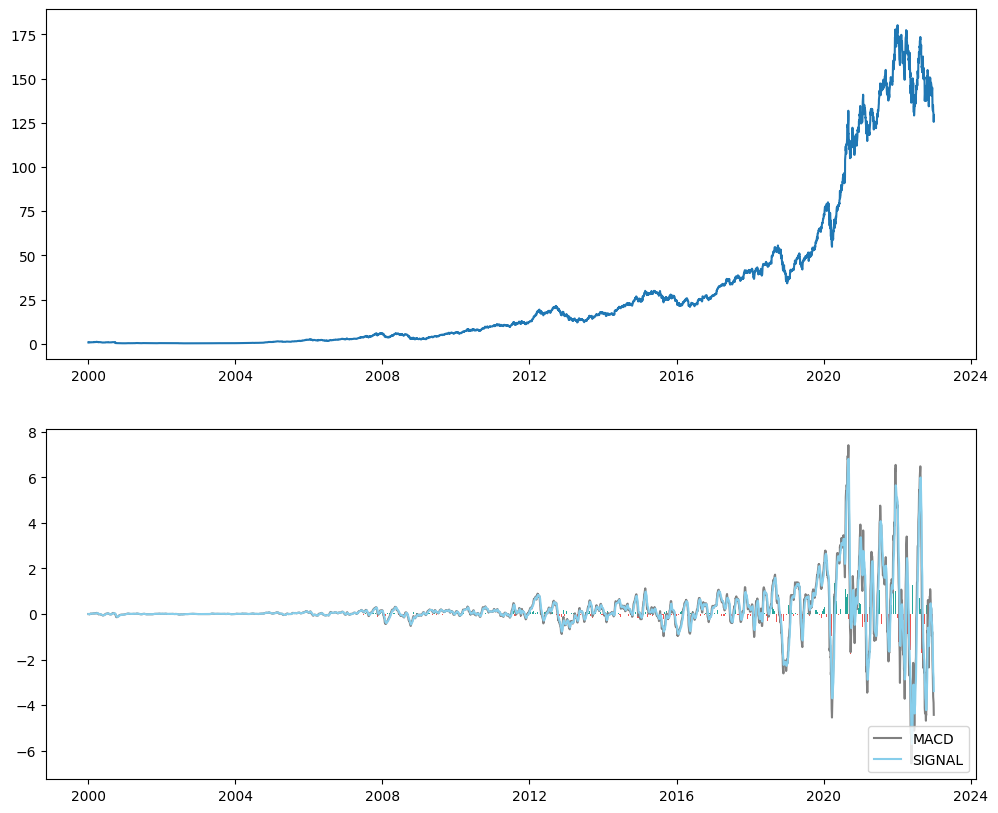

In [ ]:
import matplotlib.pyplot as plt

def plot_macd(prices, macd, signal, hist):
    # Adjust the figure size
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    ax1.plot(prices)
    ax2.plot(macd, color='grey', linewidth=1.5, label='MACD')
    ax2.plot(signal, color='skyblue', linewidth=1.5, label='SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color='#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color='#26a69a')

    plt.legend(loc='lower right')

# Example usage
plot_macd(df['AAPL'], df_macd['macd'], df_macd['signal'], df_macd['hist'])
plt.show()


Zoom in

In [ ]:
df2=df.copy()
df2=df2.loc['2018-01-01':'2018-12-31']

In [ ]:
def get_macd(price, slow, fast, smooth):
  exp1 = price.ewm(span = fast, adjust = False).mean()
  exp2 = price.ewm(span = slow, adjust = False).mean()
  macd = pd.DataFrame(exp1 - exp2).rename(columns = {'AAPL':'macd'})
  signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
  hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
  frames = [macd, signal, hist]
  df = pd.concat(frames, join = 'inner', axis = 1)
  return df

df_macd = get_macd(df2['AAPL'], 26, 12, 9)
df_macd.tail()

,macd,signal,hist
2018-12-24,-2.501820,-2.226109,-0.275710
2018-12-26,-2.409776,-2.262843,-0.146933
2018-12-27,-2.329751,-2.276224,-0.053526
2018-12-28,-2.238970,-2.268773,0.029804
2018-12-31,-2.113388,-2.237696,0.124308


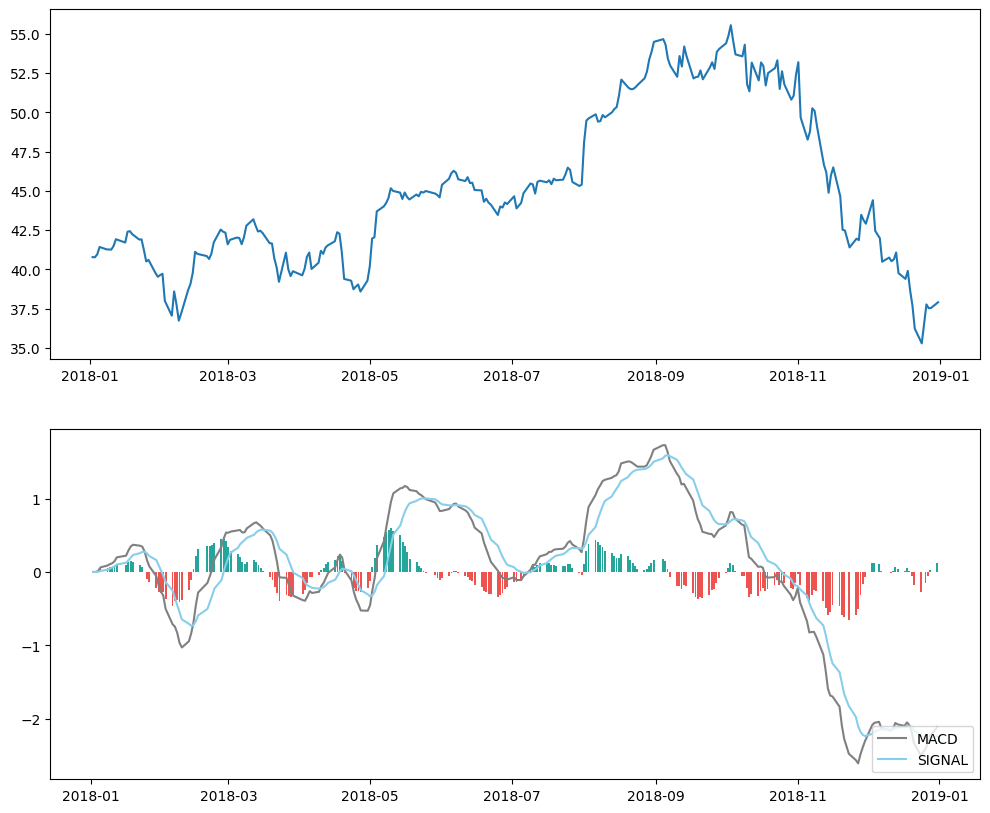

In [ ]:
import matplotlib.pyplot as plt

def plot_macd(prices, macd, signal, hist):
    # Adjust the figure size
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    ax1.plot(prices)
    ax2.plot(macd, color='grey', linewidth=1.5, label='MACD')
    ax2.plot(signal, color='skyblue', linewidth=1.5, label='SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color='#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color='#26a69a')

    plt.legend(loc='lower right')

# Example usage
plot_macd(df2['AAPL'], df_macd['macd'], df_macd['signal'], df_macd['hist'])
plt.show()
